Step 1: Import the necessary **libraries**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load Data and Perform EDA

In [ ]:
# Load the dataset
data = pd.read_csv('/content/50_Startups.csv')


In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# Check the dimensions of the dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (50, 4)


In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


In [ ]:
# Summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
            R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


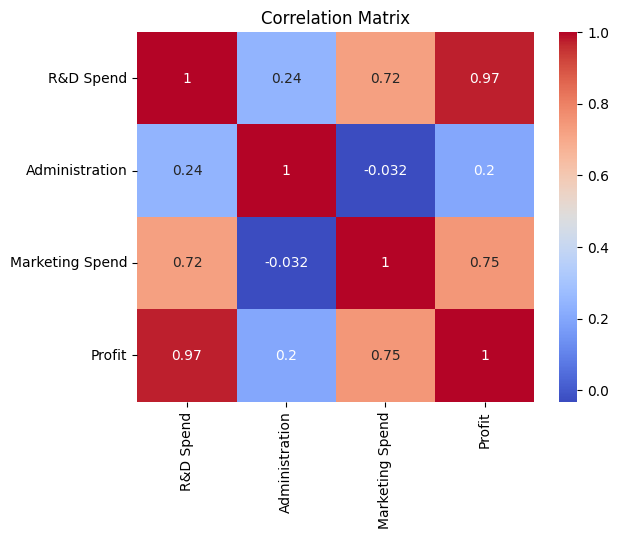

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

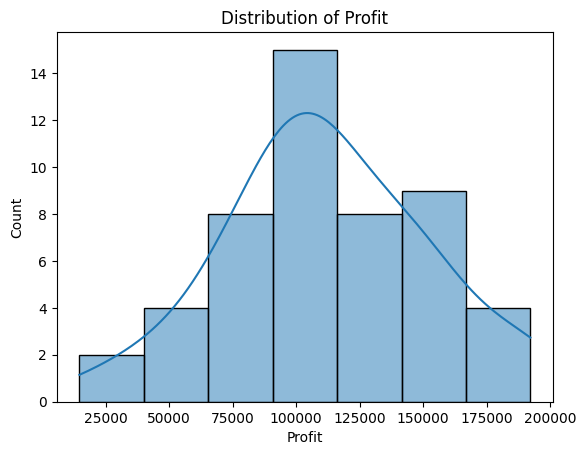

In [ ]:
# Distribution of target variable
sns.histplot(data['Profit'], kde=True)
plt.xlabel('Profit')
plt.ylabel('Count')
plt.title('Distribution of Profit')
plt.show()

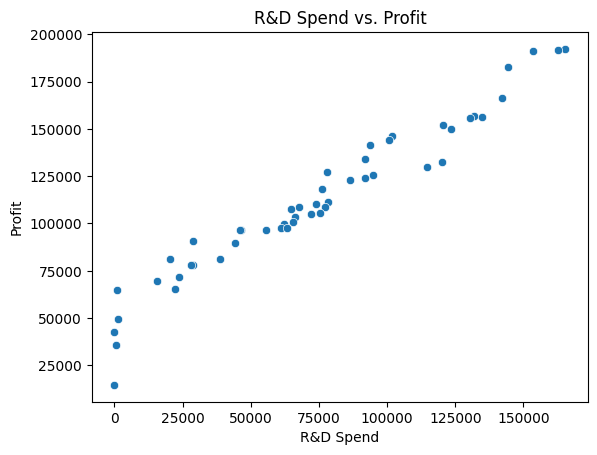

In [ ]:
# Scatter plots of features vs. target variable
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs. Profit')
plt.show()

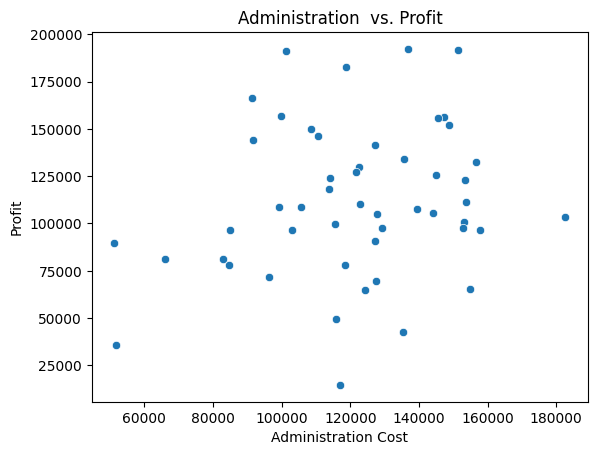

In [ ]:
sns.scatterplot(x='Administration', y='Profit', data=data)
plt.xlabel('Administration Cost')
plt.ylabel('Profit')
plt.title('Administration  vs. Profit')
plt.show()

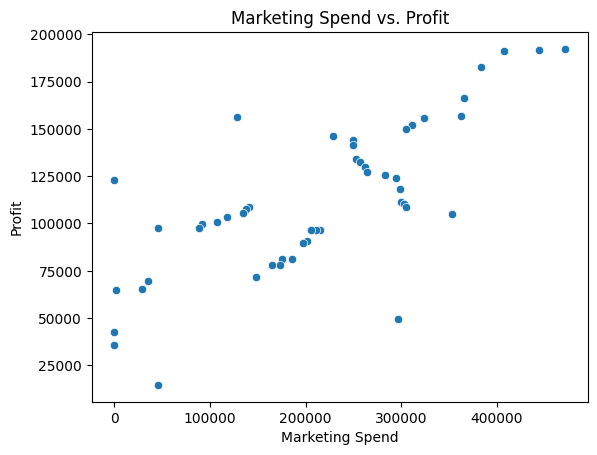

In [ ]:
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs. Profit')
plt.show()

Step 3: Prepare the data

In [ ]:
# Prepare the data
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

Step 4: Split the data into train and test sets

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Construct different regression models

In [ ]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Random Forest Regression
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)


RandomForestRegressor()

Step 6: Make predictions on the test set

In [ ]:
# Make predictions on the test set
linear_reg_predictions = linear_reg.predict(X_test)
tree_reg_predictions = tree_reg.predict(X_test)
forest_reg_predictions = forest_reg.predict(X_test)


Step 7: Calculate regression metrics

In [ ]:
# Calculate regression metrics
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

tree_reg_mse = mean_squared_error(y_test, tree_reg_predictions)
tree_reg_mae = mean_absolute_error(y_test, tree_reg_predictions)
tree_reg_r2 = r2_score(y_test, tree_reg_predictions)

forest_reg_mse = mean_squared_error(y_test, forest_reg_predictions)
forest_reg_mae = mean_absolute_error(y_test, forest_reg_predictions)
forest_reg_r2 = r2_score(y_test, forest_reg_predictions)


Step 8: Compare and choose the best model based on the metrics

In [ ]:
# Print the metrics for each model
print("Linear Regression:")
print("MSE:", linear_reg_mse)
print("MAE:", linear_reg_mae)
print("R^2:", linear_reg_r2)
print()

Linear Regression:
MSE: 80926321.22295158
MAE: 6979.152252370402
R^2: 0.9000653083037321



In [ ]:
print("Decision Tree Regression:")
print("MSE:", tree_reg_mse)
print("MAE:", tree_reg_mae)
print("R^2:", tree_reg_r2)
print()

Decision Tree Regression:
MSE: 161851110.35489988
MAE: 9982.975999999995
R^2: 0.800132508563502



In [ ]:
print("Random Forest Regression:")
print("MSE:", forest_reg_mse)
print("MAE:", forest_reg_mae)
print("R^2:", forest_reg_r2)
print()

Random Forest Regression:
MSE: 75730965.92156519
MAE: 5941.369350000001
R^2: 0.9064809740902224



In [ ]:
# Find the model with the lowest MSE
model_names = {
    "Linear Regression": linear_reg_mse,
    "Decision Tree Regression": tree_reg_mse,
    "Random Forest Regression": forest_reg_mse
}
best_model_name = min(model_names, key=model_names.get)
print("Best Model:", best_model_name)


Best Model: Random Forest Regression


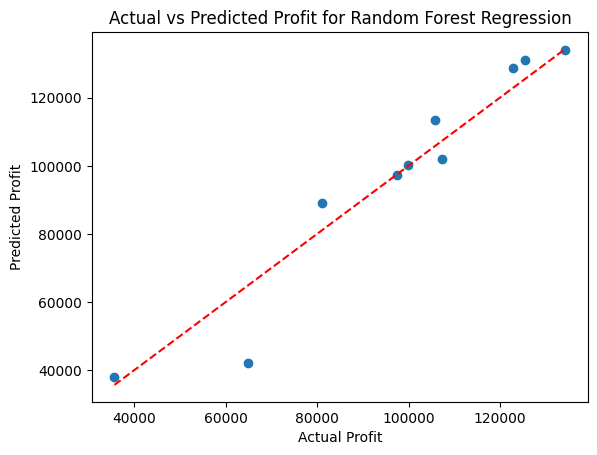

In [ ]:
# Plot the actual vs predicted values for the best model
if best_model_name == "Linear Regression":
    best_model_predictions = linear_reg_predictions
elif best_model_name == "Decision Tree Regression":
    best_model_predictions = tree_reg_predictions
else:
    best_model_predictions = forest_reg_predictions

plt.scatter(y_test, best_model_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit for {}'.format(best_model_name))
plt.show()